![Logo de AA1](logo_AA1_texto_small.png) 
# Sesión 13 - Regresión logística y AUC

En esta sesión de prácticas vamos a trabajar con la regresión logística. Aunque por el nombre pueda parecer que se trata de un algoritmo para resolver tareas de regresión, lo cierto es que se trata de un algoritmo para resolver tareas de clasificación que es muy utilizado.

Aprovechando que la regresión logística es un algoritmo conocido por realizar una buena estimación de la probabilidad de pertenencia de los ejemplos a cada clase, vamos también a introducir una forma de medir la calidad de los modelos que se conoce como el área bajo la curva ROC.

## 13.1 Regresión logística
La regresión logística utiliza un modelo lineal dentro de una función sigmoide para calcular la probabilidad de que un ejemplo sea de la clase 1 condicionado al valor de sus atributos:
$$
P(y=1|X_i) = \frac{1}{1+e^{-(w_1x_{i,1}+...+w_nx_{i,n}+b)}}=\frac{1}{1+e^{-(wX_i+b)}}
$$
donde $w$ y $b$ son los parámetros que debe aprender el modelo.

Vamos a cargar un conjunto de datos para practicar con la clase `LogisticRegression()` del `Scikit-learn`:

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns


print('\n##########################################')
print('### cargar el conjunto y separar X e y')
print('##########################################')

# se llama a la función read_csv
# no tiene missing y las columnas están separadas por ';'. Tiene cabecera
df = pd.read_csv('biodeg.data', header=0, sep=';')
filas, columnas = df.shape

# como la clase viene como string ('RN', 'NRB')
# se crea el objeto LabelEncoder para transformar la clase
class_enc = LabelEncoder() 

# se transforma la clase
df['experimental class'] = class_enc.fit_transform(df['experimental class'])
print("Clases:", class_enc.classes_)

# separamos los atributos y los almacenamos en X
X = df.drop(['experimental class'], axis=1)
display(X)

# separamos la clase y la almacenamos en Y
y = df['experimental class']
display(y)


##########################################
### cargar el conjunto y separar X e y
##########################################
Clases: ['NRB' 'RB']


,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,0,2.949,1.591,0,7.253,0,0
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,0,3.315,1.967,0,7.257,0,0
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,0,1,3.076,2.417,0,7.601,0,0
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,0,1,3.046,5.000,0,6.690,0,0
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,0,3.351,2.405,0,8.003,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,2,0,6,1,3.573,2.242,1,8.088,0,0
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,0,3,0,3.787,3.083,3,9.278,0,0
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,0,4,13,0,3.848,2.576,5,9.537,1,0
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,0,1,16,0,5.808,2.055,8,11.055,0,1


0       1
1       1
2       1
3       1
4       1
       ..
1050    0
1051    0
1052    0
1053    0
1054    0
Name: experimental class, Length: 1055, dtype: int32

Ahora vamos a separar el conjunto de datos en un conjunto de entrenamiento y otro de test (hold-out) manteniendo la distribución de las clases y donde un 30% de los ejemplos se reservarán para test:

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234, stratify=y)

Crearemos ahora una instancia de `LogisticRegression`, pero en lugar de utilizarla directamente, lo que haremos será crear un `Pipeline` para realizar primero una estandarización de los atributos.

`LogisticRegression`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression 

Cuando se utiliza la regresión logística es recomendable estandarizar los atributos.

Accuracy: 0.8738


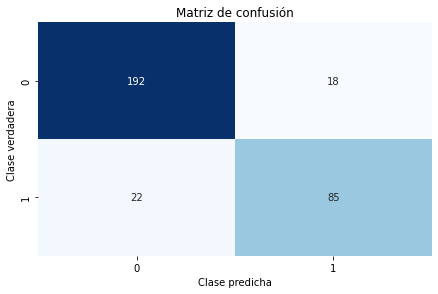

In [3]:
std_lr = Pipeline([('std', StandardScaler()), ('lr', LogisticRegression())])

# entrenamos con el conjunto de entrenamiento
std_lr.fit(X_train, y_train) 

# evaluamos con el conjunto de test
y_pred = std_lr.predict(X_test)

print("Accuracy: %.4f" % metrics.accuracy_score(y_test, y_pred))

# obtenemos la matriz de confusión
cm = metrics.confusion_matrix(y_test, y_pred, labels=std_lr.classes_)

# se crea un DataFrame en el que el contenido es la matriz de confusión 
# y los índices son las posibles etiquetas de la clase
df_cm = pd.DataFrame(cm, index=std_lr.classes_, columns=std_lr.classes_)

# se muestra gráficamente la matriz de confusión
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d', cbar=False) 
plt.title("Matriz de confusión") 
plt.tight_layout() 
plt.ylabel("Clase verdadera") 
plt.xlabel("Clase predicha")
plt.show()

En el código anterior también se ha entrenado con el conjunto de entrenamiento y se ha evaluado el modelo aprendido sobre el conjunto de casos no vistos, obteniéndose una accuracy bastante buena.

También hemos calculado la matriz de confusión, a partir de la cual, como vimos en una sesión anterior se pueden calcular muchas medidas. 

## 13.2 Curva ROC y AUC

Como comentamos al principio, la regresión logística es conocida por proporcionar buenas estimaciones de probabilidades de pertenencia a las distintas clases.

Como ya vimos en una sesión aterior, el método `predict_proba()` nos devuelve la probabilidad de pertenencia de un ejemplo a cada una de las clases:

In [4]:
print("Clases:", std_lr.classes_)

print("Probabilidades de los ejemplos 10, 11 y 12:")
print(std_lr.predict_proba(X_test[10:13]))

# se cogen las probabilidades de que sea de la clase 1
y_prob = std_lr.predict_proba(X_test)[:,1]
print("Probabilidades de que los ejemplos 10, 11 y 12 sean de la clase 1:")
print(y_prob[10:13])

Clases: [0 1]
Probabilidades de los ejemplos 10, 11 y 12:
[[0.43844017 0.56155983]
 [0.81371721 0.18628279]
 [0.58000415 0.41999585]]
Probabilidades de que los ejemplos 10, 11 y 12 sean de la clase 1:
[0.56155983 0.18628279 0.41999585]


Nos da una columna por cada clase y cuando solo hay dos clases las probabilidades de pertenencia a las dos clases son complementarias.

Así que podemos quedarnos únicamente con una de las columnas como hemos hecho en el código anterior, en el que nos hemos quedado con la probabilidad de que un ejemplo sea de la clase 1.

Normalmente asumimos que las probabilidades menores de 0.5 indicarán que se pertenece a la clase 0 mientras que probabilidades a partir de 0.5 indicarán que se pertenece a la clase 1. Sin embargo, esto no tiene por qué ser siempre así, ese umbral se puede desplazar cuando las circunstancias lo requieran.

Imaginemos que fallar un ejemplo de la clase 1 sea mucho más costoso que fallar un ejemplo de la clase 0, en tal caso, quizá nos interesase bajar el umbral a 0.4, para permitir que el algorimo sea más propenso a predecir la clase 1.

Vamos a ver cómo se distribuyen los ejemplos del conjunto de test en función de su clase y de la probabilidad de pertenencia a la clase 1:

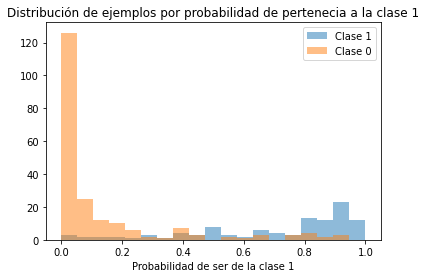

In [5]:
# obtenemos las probabilidades de los ejemplos positivos y negativos
pos = y_prob[y_test==1]
neg = y_prob[y_test==0]

# separamos el espacio entre 0 y 1 en 20 trozos 
bins = np.linspace(0, 1, 20)

# creamos un histograma
fig, ax = plt.subplots()
ax.hist(x=pos, bins=bins, alpha=0.5, label='Clase 1')
ax.hist(x=neg, bins=bins, alpha=0.5, label='Clase 0')
ax.legend(loc='best')
ax.set_title('Distribución de ejemplos por probabilidad de pertenecia a la clase 1')
ax.set_xlabel('Probabilidad de ser de la clase 1')
plt.show()

En el histograma podemos apreciar que hay ejemplos de la clase 0 con probabilidad de pertenencia a la clase 1 alta y ejemplos de clase 1 con probabilidad de pertenencia baja. Esos ejemplos estarán mal clasificados. Si trazásemos una línea a la altura de 0.5 podríamos identificar a todos los ejemplos mal clasificados, que se corresponderían con los *False Negative* y *False Positive* de la matriz de confusión.

En el histograma podemos apreciar que si bajásemos el umbral a 0.3 acertaríamos más ejemplos de la clase 1 (más costosa) sin empeorar demasido los resultados de la clase 0 (menos costosa).

Para analizar estos desplazamientos del umbral se suelen utilizar dos medidas derivadas de la matriz de confusión:
- Sensibilidad, recall o *true positive rate* (TPR). Probabilidad de que un ejemplo positivo sea etiquetado como positivo: $\frac{TP}{(TP + FN)}$
- Especificidad o *true negative rate* (TNR). Probabilidad de que un ejemplo negativo sea etiquetado como negativo: $\frac{TN}{(TN + FP)} = 1 - FPR$

Vamos a representar estas dos medidas en función del umbral de probabilidad que se elija. Para obtener esas medidas y los umbrales de corte utilizaremos la función `roc_curve()`: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc_curve#sklearn.metrics.roc_curve

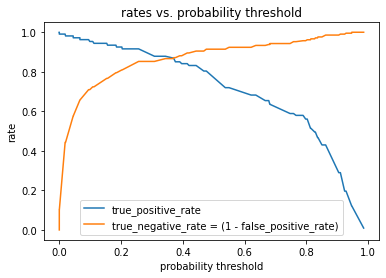

In [6]:
# obtenemos las medidas y los umbrales
false_positive_rate, true_positive_rate, threshold = metrics.roc_curve(y_test, y_prob)

# descartamos lo almacenado en [0] puesto que representa una situación con probabilidad mayor que 1
fig, ax = plt.subplots()
ax.plot(threshold[1:], true_positive_rate[1:], label='true_positive_rate')
ax.plot(threshold[1:], 1-false_positive_rate[1:], label='true_negative_rate = (1 - false_positive_rate)')
ax.set_title('rates vs. probability threshold')
ax.set_ylabel('rate')
ax.set_xlabel('probability threshold')
ax.legend(loc='best')
plt.show()

En la gráfica vemos cómo afecta modificar el umbral al acierto en ambas clases. En base a esto podríamos decidir el umbral que más nos interesase teniendo en cuenta el coste de fallar de cada clase.

Muchas veces se representa la evolución del *true positive rate* frente al *false positive rate* a medida que se varía el umbral. Esto se conoce como la curva ROC (Receiver Operating Characteristic):

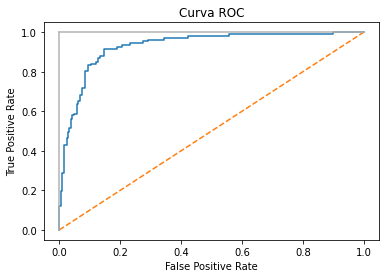

In [7]:
# pintamos la curva ROC
fig, ax = plt.subplots()
ax.set_title("Curva ROC")
ax.plot(false_positive_rate, true_positive_rate)
ax.plot([0, 1], ls="--") # se dibuja la diagonal que representa un modelo malo
ax.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7") # se dibuja en gris un modelo perfecto
ax.set_ylabel("True Positive Rate")
ax.set_xlabel("False Positive Rate")
plt.show()

Esta curva también se utiliza para comparar el rendimiento de diferentes algoritmos. La línea gris representa un modelo perfecto puesto que acierta todo mientras que la diagonal representa un modelo azaroso, puesto que el ratio de true positive es igual que el de false positive.

Para representar esto mediante un número se utilizar el área bajo la curva ROC, que se denomina AUC. Cuanto mayor sea el área mejor es el modelo. Un área de 0.5 representa el azar. Podemos calcular el AUC mediante `roc_auc_score()`:

In [8]:
# calculamos el área bajo la curva ROC
print('Area Under the Curve ROC (AUC): %.4f' % metrics.roc_auc_score(y_test, y_prob))

Area Under the Curve ROC (AUC): 0.9298


`Scikit-learn` dispone de una función que permite dibujar la curva ROC directamente sin necesidad de hacerlo nosotros mismos. Además también nos muestra el AUC:

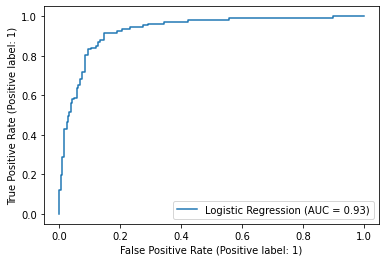

In [9]:
# dejamos que sea sklearn quien dibuje la curva ROC ;-)
metrics.RocCurveDisplay.from_estimator(std_lr, X_test, y_test, name='Logistic Regression') 
plt.show()

## 13.3 Hiperparámetro `C` en la regresión logística

Durante el entrenamiento de una regresión logística, a veces puede ocurrir que el modelo se ajuste tanto a los ejemplos de entrenamiento que luego, al evaluarlo ante casos no vistos, el rendimiento puede no ser tan bueno como se esperaba.

Esto se conoce como **sobreajuste** y dedicaremos una sesión de prácticas más adelante a hablar sobre este efecto. El sobreajuste es algo que puede suceder con todos los sistemas y aunque puede depender de muchos factores, se presenta más frecuentemente cuando no se dispone de un conjunto de entrenamiento representativo.

Muchos algoritmos disponen de mecanismos para evitar el sobreajuste. Por ejemplo, en la sesión anterior vimos cómo se podía limitar el tamaño de los árboles de decisión para que no se ajustasen demasiado.

La regresión logística dispone de un hiperparámetro que actúa de equilibrio entre lo que se ajusta el modelo para intentar acertar todos los ejemplos de entrenamiento y la magnitud de los valores que se aprenden para los parámetros $w$ y $b$ (suele utilizarse la norma-l2 como regularizador de estos parámetros).

Así, el hiperparámetro `C` tendrá por defecto el valor 1, dando el mismo peso a la regularización de los parámetros que a acertar los ejemplos de entrenamiento. Si utilizamos valores mayores de 1 estaremos dando más peso a acertar los ejemplos de entrenamiento (nos ajustaremos más) y si utilizamos valores en el rango [0,1) estaremos dando más peso a la regularización (y nos ajustaremos menos).

In [10]:
# realizamos nuevamente la partición dejando sólo el 30% para entrenar
# además no hacemos la partición estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1234)

# a la regresión logística le incrementamos el máximo número de iteraciones durante el entrenamiento
# si no lo hacemos veremos un warning en la consola porque algún valor de C necesita más iteraciones
std_lr = Pipeline([('std', StandardScaler()), ('lr', LogisticRegression(max_iter=1000))])

# hacemos un bucle para probar varios valores de C
for i in [0.001, 0.01, 0.1, 1, 10, 100, 100]:
    std_lr.set_params(lr__C=i)
    std_lr.fit(X_train, y_train) 
    y_pred = std_lr.predict(X_test)
    print("Accuracy (C=%.3f): %.4f" % (std_lr.get_params()['lr__C'], metrics.accuracy_score(y_test, y_pred)))

Accuracy (C=0.001): 0.6428
Accuracy (C=0.010): 0.7673
Accuracy (C=0.100): 0.8281
Accuracy (C=1.000): 0.8444
Accuracy (C=10.000): 0.8376
Accuracy (C=100.000): 0.8173
Accuracy (C=100.000): 0.8173


Vemos en la salida cómo afecta la C:
- Valores muy pequeños hacen que el sistema no aprenda bien y luego clasifica mal los ejemplos de test
- Valores muy grandes hacen que el sistema aprenda demasiado (se ajusta mucho a los ejemplos de entrenamiento) y también clasifica mal los ejemplos de test

¿Cuál es el mejor valor de C? No se sabe. Es un hiperparámetro para el que habrá que buscar el mejor valor y eso se podrá hacer utilizando `GridSearchCV()` o `RandomizedSearchCV()` como ya vimos en una sesión anterior.

Existe también la posibilidad de buscar el mejor valor de C utilizando la función `LogisticRegressionCV()`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html?highlight=logisticregressioncv#sklearn.linear_model.LogisticRegressionCV

`LogisticRegressionCV()` tiene la ventaja de que puede aprovechar aspectos comunes de los diferentes modelos para ser un poco más rápido. Sin embargo, tiene varias desventajas, ya que no se puede utilizar si tenemos la regresión logística en un `Pipeline` o si queremos buscar valores para otros hiperparámetros de la regresión logística.



## Ejercicios

1. Carga el fichero **biodeg.data** (es un archivo de texto). 
2. Separar el conjunto en 70% para entrenar y 30% para test (estratificado)
3. Crea 3 sistemas: baseline clase mayoritaria, K vecinos y regresión logística
4. Haz una búsqueda de hiperparámetros (`GridSearchCV()`) utilizando los ejemplos del conjunto de entrenamiento. Prueba con diferente número de vecinos en el `KNN` y con diferentes valores de `C` en la regresión logística.
5. Comprueba la accuracy de los tres sistemas en el conjunto de test.
6. Dibuja la curva ROC y muestra el AUC.

Estos ejercicios no es necesario entregarlos.